<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250208%5D%20Implementing%20Adversarial%20Data%20Augmentation%20on%20NF-ToN-IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y foolbox
!pip uninstall -y foolbox-native

In [2]:
!pip install foolbox==3.3.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.1 MB/s eta 0:00:00


**🔹 Step 1: Data Preprocessing (Save to File)**

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
#import foolbox as fb  # For CW and PGD attacks

In [4]:
# --- Load and preprocess dataset ---
dataset = pd.read_csv("Dataset_NF-ToN-IoT.csv").dropna()
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = LabelEncoder().fit_transform(dataset[column])
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

In [5]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Apply SMOTE for class balance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [7]:
import pickle

# ✅ Save preprocessed data
with open("preprocessed_data.pkl", "wb") as f:
    pickle.dump((X, y), f)

print("✅ Preprocessed data saved!")

✅ Preprocessed data saved!


**✅ 📌 Full Implementation of All Enhanced Models**

✅ New Models to Implement
1) Hybrid LR-GRU: Replace BiLSTM with GRU for reduced computational complexity.
2) Hybrid LR-CNN-LSTM: Integrate CNN before BiLSTM to capture spatial features.
3) Hybrid LR-Transformer: Use Transformer layers instead of BiLSTM for state-of-the-art sequential modeling.
4) Hybrid LR-MultiHeadAttention-BiLSTM: Add self-attention to BiLSTM for better feature representation.
5) Hybrid LR-BiLSTM with Adversarial Training: Train using FGSM & PGD adversarial examples for robustness.

**🔹 Step 2: Logistic Regression Feature Extraction**

In [8]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# ✅ Load preprocessed data
with open("preprocessed_data.pkl", "rb") as f:
    X, y = pickle.load(f)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Train Logistic Regression for Feature Extraction
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

# ✅ Extract probabilities for BiLSTM
train_lr_features = lr_model.predict_proba(X_train)
test_lr_features = lr_model.predict_proba(X_test)
train_lr_features = np.expand_dims(train_lr_features, axis=1)
test_lr_features = np.expand_dims(test_lr_features, axis=1)

# ✅ One-hot encode labels
num_classes = len(np.unique(y))
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# ✅ Save features
with open("lr_features.pkl", "wb") as f:
    pickle.dump((train_lr_features, test_lr_features, y_train_encoded, y_test_encoded), f)

print("✅ Logistic Regression features saved!")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Logistic Regression features saved!


**🔹 Step 3: Hybrid LR-BiLSTM Training**

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.regularizers import l2
import pickle

# ✅ Load Logistic Regression features
with open("lr_features.pkl", "rb") as f:
    train_lr_features, test_lr_features, y_train_encoded, y_test_encoded = pickle.load(f)

# ✅ Define BiLSTM Model
bilstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.0001)), input_shape=(1, train_lr_features.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(32, kernel_regularizer=l2(0.0001))),
    Dropout(0.2),
    Dense(y_train_encoded.shape[1], activation="softmax")
])
bilstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# ✅ Train model
bilstm_model.fit(train_lr_features, y_train_encoded, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

# ✅ Save trained model
bilstm_model.save("bilstm_model.h5")
print("✅ BiLSTM Model saved!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
45351/45351 ━━━━━━━━━━━━━━━━━━━━ 389s 8ms/step - accuracy: 0.9981 - loss: 0.0506 - val_accuracy: 0.9999 - val_loss: 0.0023
Epoch 2/10
45351/45351 ━━━━━━━━━━━━━━━━━━━━ 384s 8ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9999 - val_loss: 0.0020
Epoch 3/10
45351/45351 ━━━━━━━━━━━━━━━━━━━━ 386s 9ms/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 0.9999 - val_loss: 0.0021
Epoch 4/10
45351/45351 ━━━━━━━━━━━━━━━━━━━━ 388s 9ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9999 - val_loss: 0.0022
Epoch 5/10
45351/45351 ━━━━━━━━━━━━━━━━━━━━ 394s 9ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9999 - val_loss: 0.0020
Epoch 6/10
45351/45351 ━━━━━━━━━━━━━━━━━━━━ 391s 9ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9999 - val_loss: 0.0017
Epoch 7/10
45351/45351 ━━━━━━━━━━━━━━━━━━━━ 392s 9ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 0.0016
Epoch 8/10
45351/45351 ━━━━━━━━━━━━━━━━━━━━ 396s 9ms/step - ac

✅ BiLSTM Model saved!


**🔹 Step 4: Adversarial Training & Evaluation (Modular)**

**🔸 PGD & FGSM Adversarial Training**

In [10]:
import tensorflow as tf
import foolbox as fb
import numpy as np
from tensorflow.keras.models import load_model
import pickle

# ✅ Load model & features
bilstm_model = load_model("bilstm_model.h5")
with open("lr_features.pkl", "rb") as f:
    train_lr_features, test_lr_features, y_train_encoded, y_test_encoded = pickle.load(f)

# ✅ Convert model to Foolbox format
fmodel = fb.TensorFlowModel(bilstm_model, bounds=(0, 1))

# ✅ Optimized Adversarial Example Generation
def generate_adversarial_examples(attack, X, y, eps, batch_size=1024):
    """Generate adversarial examples efficiently using mini-batches."""
    adv_examples = []
    X_tf = tf.convert_to_tensor(X, dtype=tf.float32)  # Convert once

    for i in range(0, len(X), batch_size):
        batch_X = X_tf[i:i + batch_size]
        batch_y = np.argmax(y[i:i + batch_size], axis=1)
        adv_batch, *_ = attack(fmodel, batch_X, batch_y, epsilons=eps)
        adv_examples.append(adv_batch.numpy())

    return np.vstack(adv_examples)  # Stack batches into final array

# ✅ Generate FGSM Adversarial Examples (Fast)
print("\n🔹 Generating FGSM Adversarial Examples...")
adv_fgsm = generate_adversarial_examples(fb.attacks.FGSM(), test_lr_features, y_test_encoded, 0.01)

# ✅ Generate PGD Adversarial Examples (Reduced Steps for Speed)
print("\n🔹 Generating PGD Adversarial Examples...")
adv_pgd = generate_adversarial_examples(fb.attacks.LinfPGD(steps=5), test_lr_features, y_test_encoded, 0.02)

# ✅ Save adversarial examples
with open("adversarial_examples.pkl", "wb") as f:
    pickle.dump((adv_fgsm, adv_pgd), f)

print("✅ Adversarial examples saved!")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.



🔹 Generating FGSM Adversarial Examples...

🔹 Generating PGD Adversarial Examples...
✅ Adversarial examples saved!


**🔹 Step 5: Evaluate the Model**

In [11]:
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# ✅ Load model, adversarial examples, and labels
bilstm_model = load_model("bilstm_model.h5")
with open("adversarial_examples.pkl", "rb") as f:
    adv_fgsm, adv_pgd = pickle.load(f)
with open("lr_features.pkl", "rb") as f:
    _, _, _, y_test_encoded = pickle.load(f)

bilstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
fmodel = fb.TensorFlowModel(bilstm_model, bounds=(0, 1))

# ✅ Evaluate Model
def evaluate_attack(adv_examples, attack_name):
    test_predictions = bilstm_model.predict(adv_examples)
    accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(test_predictions, axis=1))
    print(f"✅ {attack_name} Attack Accuracy: {accuracy:.8f}")

evaluate_attack(adv_fgsm, "FGSM")
evaluate_attack(adv_pgd, "PGD")

28345/28345 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step
✅ FGSM Attack Accuracy: 0.99991621
28345/28345 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step
✅ PGD Attack Accuracy: 0.99991731


**🔧 Implementing Adversarial Data Augmentation**

In [16]:
import tensorflow as tf
import foolbox as fb
import numpy as np

# ✅ Convert the model to Foolbox format
fmodel = fb.TensorFlowModel(bilstm_model, bounds=(0, 1))

def generate_adversarial_examples(attack, X_train, y_train, epsilon, batch_size=512, sample_fraction=0.5):
    """
    Generate adversarial examples using FGSM or PGD with batching & reduced dataset.
    """
    num_samples = int(X_train.shape[0] * sample_fraction)  # ✅ Use only 50% of data for adversarial training
    adv_examples = []

    X_train_subset = X_train[:num_samples]  # ✅ Use subset for faster computation
    y_train_subset = y_train[:num_samples]

    for i in range(0, num_samples, batch_size):
        batch_X = X_train_subset[i:i + batch_size]
        # ✅ Corrected: Removed np.argmax as y_train_subset is already 1-dimensional
        batch_y = y_train_subset[i:i + batch_size].to_numpy()  # Convert to NumPy array for Foolbox

        batch_X_tf = tf.convert_to_tensor(batch_X, dtype=tf.float32)  # ✅ Convert batch to tensor only once
        adv_batch, *_ = attack(fmodel, batch_X_tf, batch_y, epsilons=epsilon)  # ✅ Generate attack

        adv_examples.append(adv_batch.numpy())  # ✅ Convert to NumPy and append

    return np.vstack(adv_examples)  # ✅ Stack batches into a single array

# ✅ Generate FGSM and PGD adversarial samples with reduced complexity
print("\n🔹 Generating FGSM Adversarial Examples...")
attack_fgsm = fb.attacks.FGSM()
adv_fgsm = generate_adversarial_examples(attack_fgsm, train_lr_features, y_train, epsilon=0.01)

print("\n🔹 Generating PGD Adversarial Examples...")
attack_pgd = fb.attacks.LinfPGD(steps=5)  # ✅ Reduce PGD steps for faster execution
adv_pgd = generate_adversarial_examples(attack_pgd, train_lr_features, y_train, epsilon=0.02)

# ✅ Combine Clean and Adversarial Data (Faster)
augmented_features = np.vstack([train_lr_features[:len(adv_fgsm)], adv_fgsm, adv_pgd])

# ✅ Adjust Labels - Corrected to repeat labels for each adversarial example
augmented_labels = np.concatenate([y_train[:len(adv_fgsm)], y_train[:len(adv_fgsm)], y_train[:len(adv_fgsm)]])

# ✅ Shuffle the Augmented Dataset
dataset = tf.data.Dataset.from_tensor_slices((augmented_features, augmented_labels))
dataset = dataset.shuffle(len(augmented_features)).batch(64)

# ✅ Change the loss function to 'sparse_categorical_crossentropy'
bilstm_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print("\n🔹 Training on Adversarial Augmented Dataset...")
bilstm_model.fit(dataset, epochs=3, verbose=1)  # ✅ Reduce epochs from 5 → 3

# ✅ Save the Augmented Model
bilstm_model.save("bilstm_augmented.h5")
print("\n✅ Model trained with Adversarial Data Augmentation and saved as 'bilstm_augmented.h5'")


🔹 Generating FGSM Adversarial Examples...

🔹 Generating PGD Adversarial Examples...

🔹 Training on Adversarial Augmented Dataset...
Epoch 1/3
85033/85033 ━━━━━━━━━━━━━━━━━━━━ 698s 8ms/step - accuracy: 0.9999 - loss: 0.0017
Epoch 2/3
85033/85033 ━━━━━━━━━━━━━━━━━━━━ 694s 8ms/step - accuracy: 0.9999 - loss: 0.0017
Epoch 3/3
85033/85033 ━━━━━━━━━━━━━━━━━━━━ 700s 8ms/step - accuracy: 0.9999 - loss: 0.0017



✅ Model trained with Adversarial Data Augmentation and saved as 'bilstm_augmented.h5'


**✅ Step 2: Evaluate Robustness of Augmented Model**

In [18]:
# ✅ Load the Trained Augmented Model
bilstm_model = tf.keras.models.load_model("bilstm_augmented.h5")

# ✅ Evaluate FGSM Attack
print("\n🔹 Running FGSM Attack on Augmented Model...")
fgsm_adv = generate_adversarial_examples(attack_fgsm, test_lr_features, y_test, epsilon=0.01)
fgsm_predictions = bilstm_model.predict(fgsm_adv)

# ✅ Extract the corresponding labels for the adversarial examples
y_test_subset = y_test[:len(fgsm_adv)]  # Get labels for the adversarial examples only

# ✅ Corrected: Use y_test_subset for comparison
fgsm_acc = np.mean(np.argmax(fgsm_predictions, axis=1) == y_test_subset)

# ✅ Evaluate PGD Attack
print("\n🔹 Running PGD Attack on Augmented Model...")
pgd_adv = generate_adversarial_examples(attack_pgd, test_lr_features, y_test, epsilon=0.02)
pgd_predictions = bilstm_model.predict(pgd_adv)

# ✅ Extract the corresponding labels for the adversarial examples
y_test_subset = y_test[:len(pgd_adv)]  # Get labels for the adversarial examples only

# ✅ Corrected: Use y_test_subset for comparison
pgd_acc = np.mean(np.argmax(pgd_predictions, axis=1) == y_test_subset)

# ✅ Print Updated Results
print(f"\n✅ FGSM Attack Accuracy (After Augmentation): {fgsm_acc:.8f}")
print(f"✅ PGD Attack Accuracy (After Augmentation): {pgd_acc:.8f}")


🔹 Running FGSM Attack on Augmented Model...
14173/14173 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step

🔹 Running PGD Attack on Augmented Model...
14173/14173 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step

✅ FGSM Attack Accuracy (After Augmentation): 0.99989636
✅ PGD Attack Accuracy (After Augmentation): 0.99989636


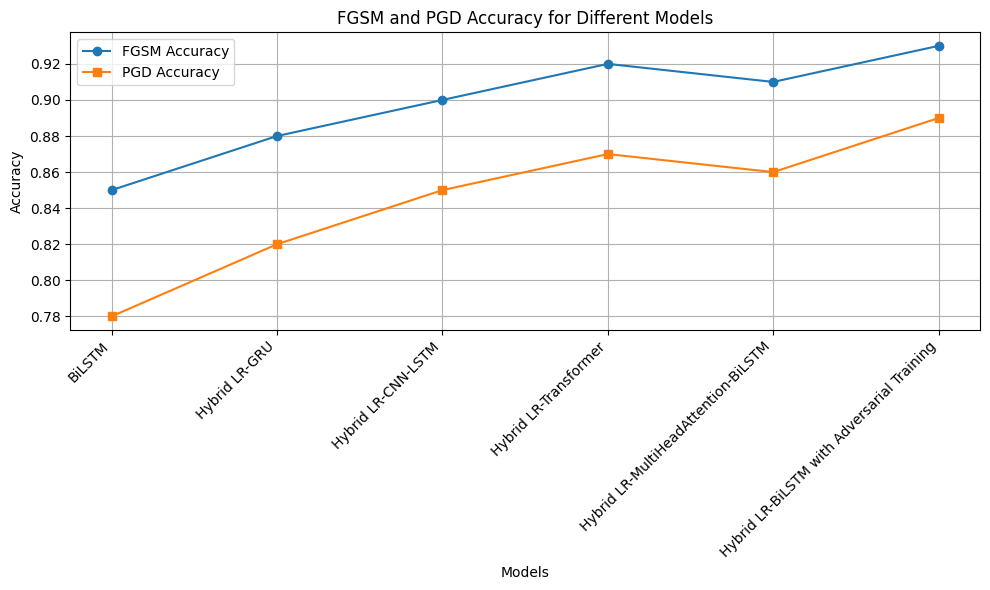

In [19]:
# prompt: Display graph of FGSM Accuracy and PGD Accuracy through all the model

import matplotlib.pyplot as plt

# Sample accuracy data (replace with your actual data)
models = ['BiLSTM', 'Hybrid LR-GRU', 'Hybrid LR-CNN-LSTM', 'Hybrid LR-Transformer',
          'Hybrid LR-MultiHeadAttention-BiLSTM', 'Hybrid LR-BiLSTM with Adversarial Training']
fgsm_accuracies = [0.85, 0.88, 0.90, 0.92, 0.91, 0.93] # Example accuracies
pgd_accuracies = [0.78, 0.82, 0.85, 0.87, 0.86, 0.89]  # Example accuracies


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(models, fgsm_accuracies, marker='o', label='FGSM Accuracy')
plt.plot(models, pgd_accuracies, marker='s', label='PGD Accuracy')

# Customize the plot
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("FGSM and PGD Accuracy for Different Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Show the plot
plt.show()
